In [131]:
# Library imports
from __future__ import absolute_import, division, print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy.stats import spearmanr
from pylab import rcParams
import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from scipy import stats
import seaborn as sns
sns.set(color_codes=True)


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [121]:
# Read in data - 6362620 rows × 11 columns
data = pd.read_csv('../static/transactions.csv')

In [123]:
# Classified as  Fraud
FraudulentTransacctions = data[data.isFraud == 1].type.value_counts()
FraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
FraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]
FraudDebit = data.loc[(data.isFraud == 1) & (data.type == 'DEBIT')] = data.loc[(data.isFraud == 1) & (data.type == 'DEBIT')]
FraudTransfer = len(FraudTransfer)
FraudCashout = len(FraudCashout)
print("The number of Fraud Transfer are: ", FraudTransfer)
print("The number of Fraud Cashout are: ", FraudCashout)

The number of Fraud Transfer are:  4097
The number of Fraud Cashout are:  4116


# Data Exploration

In [286]:
# Subset on Transfer as only Transfer and Cash Out contain fraud instances
transfer = data[data['type'] ==  'TRANSFER']
type_transfer = np.array(pd.DataFrame(transfer, columns=['amount','oldbalanceOrg', 'oldbalanceDest','newbalanceDest','isFraud']))
num = len(type_transfer)

print("The number of Fraud Transfer are: ", FraudTransfer)
print ("The total number of transactions are: ", num)



The number of Fraud Transfer are:  4097
The total number of transactions are:  532909


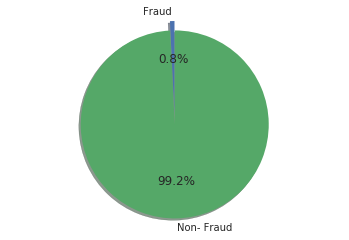

<Figure size 720x432 with 0 Axes>

In [288]:


labels = 'Fraud', 'Non- Fraud'
sizes = [4097,528812]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.figure(figsize=(10, 6))


plt.show()

Data split 

In [148]:
X = np.array(pd.DataFrame(transfer, columns=['amount','oldbalanceOrg', 'oldbalanceDest']))
f = transfer['isFraud']
y = np.array(f.reshape(len(y_transfer), ))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


# Random under-sampling

In [149]:
# Apply the random under-sampling
rus = RandomUnderSampler()
X_RUS, y_RUS = rus.fit_sample(X, y)


# Random over-sampling

In [150]:
ros = RandomOverSampler()
X_ROS, y_ROS = ros.fit_sample(X, y)

# SMOTE

In [151]:
sm = SMOTE(kind='regular')
X_SMOTE, y_SMOTE = sm.fit_sample(X, y)

# Dataset visualization under the three sampling techniques

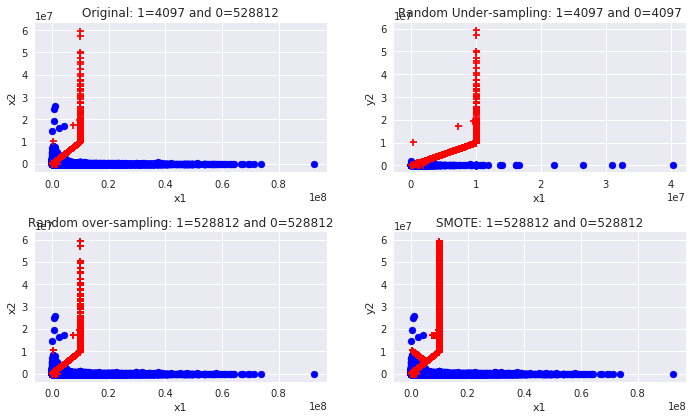

In [153]:
# Original vs resampled subplots
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.scatter(X[y==0,0], X[y==0,1], marker='o', color='blue')
plt.scatter(X[y==1,0], X[y==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original: 1=%s and 0=%s' %(y.tolist().count(1), y.tolist().count(0)))

plt.subplot(2,2,2)
plt.scatter(X_RUS[y_RUS==0,0], X_RUS[y_RUS==0,1], marker='o', color='blue')
plt.scatter(X_RUS[y_RUS==1,0], X_RUS[y_RUS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('Random Under-sampling: 1=%s and 0=%s' %(y_RUS.tolist().count(1), y_RUS.tolist().count(0)))                                                                                          

plt.subplot(2,2,3)
plt.scatter(X_ROS[y_ROS==0,0], X_ROS[y_ROS==0,1], marker='o', color='blue')
plt.scatter(X_ROS[y_ROS==1,0], X_ROS[y_ROS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random over-sampling: 1=%s and 0=%s' %(y_ROS.tolist().count(1), y_ROS.tolist().count(0)))

plt.subplot(2,2,4)
plt.scatter(X_SMOTE[y_SMOTE==0,0], X_SMOTE[y_SMOTE==0,1], marker='o', color='blue')
plt.scatter(X_SMOTE[y_SMOTE==1,0], X_SMOTE[y_SMOTE==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('SMOTE: 1=%s and 0=%s' %(y_SMOTE.tolist().count(1), y_SMOTE.tolist().count(0)))

plt.tight_layout()
plt.show()

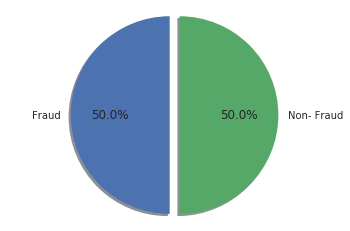

In [287]:

labels = 'Fraud', 'Non- Fraud'
sizes = [528812,528812]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Logistic Regression

In [173]:

logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.99


#  Logistic Regression on various resampling methods and evaluate performance

In [176]:
X_RUS_train, X_RUS_test, y_RUS_train, y_RUS_test = train_test_split(X_RUS, y_RUS, test_size=0.3, random_state=2017)
X_ROS_train, X_ROS_test, y_ROS_train, y_ROS_test = train_test_split(X_ROS, y_ROS, test_size=0.3, random_state=2017)
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=2017)

In [178]:
logistic = LogisticRegression()

logistic_rus = logistic.fit(X_RUS_train, y_RUS_train)
logistic_ros = logistic.fit(X_ROS_train, y_ROS_train)
logistic_smote = logistic.fit(X_SMOTE_train, y_SMOTE_train)

In [217]:
# evaluate model performance
print ("\nRUS(Random Under-Sampling)- Train AUC : ",metrics.roc_auc_score(y_RUS_train, logistic.predict(X_RUS_train)))
print ("RUS -(Random Under-Sampling) Test AUC : ",metrics.roc_auc_score(y_RUS_test, logistic.predict(X_RUS_test)))
print("**********************************")

print ("ROS (Random Over-sampling) - Train AUC : ",metrics.roc_auc_score(y_ROS_train, logistic.predict(X_ROS_train)))
print ("ROS -(Random Over-sampling)Test AUC : ",metrics.roc_auc_score(y_ROS_test, logistic.predict(X_ROS_test)))
print("**********************************")

print("\nSMOTE (Regular SMOTE) - Train AUC : ",metrics.roc_auc_score(y_SMOTE_train, logistic.predict(X_SMOTE_train)))
print ("SMOTE - (Regular SMOTE)Test AUC : ",metrics.roc_auc_score(y_SMOTE_test, logistic.predict(X_SMOTE_test)))
print("**********************************")


RUS(Random Under-Sampling)- Train AUC :  0.9896079392913776
RUS -(Random Under-Sampling) Test AUC :  0.9917503083625814
**********************************
ROS (Random Over-sampling) - Train AUC :  0.9873947361100551
ROS -(Random Over-sampling)Test AUC :  0.9877681478292647
**********************************

SMOTE (Regular SMOTE) - Train AUC :  0.9875593855955929
SMOTE - (Regular SMOTE)Test AUC :  0.9878218338481621
**********************************


# Decision tree classifier on various resampling methods and evaluate performance

In [285]:
clf = tree.DecisionTreeClassifier(random_state=201)
clf_rus = clf.fit(X_RUS_train, y_RUS_train)
clf_ros = clf.fit(X_ROS_train, y_ROS_train)
clf_smote = clf.fit(X_SMOTE_train, y_SMOTE_train)                        
# evaluate model performance
print ("\nRUS(Random Under-Sampling)- Train AUC : ",metrics.roc_auc_score(y_RUS_train, clf.predict(X_RUS_train)))
print ("RUS -(Random Under-Sampling) Test AUC : ",metrics.roc_auc_score(y_RUS_test, clf.predict(X_RUS_test)))
print("**********************************")

print ("ROS (Random Over-sampling) - Train AUC : ",metrics.roc_auc_score(y_ROS_train, clf.predict(X_ROS_train)))
print ("ROS -(Random Over-sampling)Test AUC : ",metrics.roc_auc_score(y_ROS_test, clf.predict(X_ROS_test)))
print("**********************************")

print("\nSMOTE (Regular SMOTE) - Train AUC : ",metrics.roc_auc_score(y_SMOTE_train, clf.predict(X_SMOTE_train)))
print ("SMOTE - (Regular SMOTE)Test AUC : ",metrics.roc_auc_score(y_SMOTE_test, clf.predict(X_SMOTE_test)))
print("**********************************")


RUS(Random Under-Sampling)- Train AUC :  0.9861234863040973
RUS -(Random Under-Sampling) Test AUC :  0.9860111910471623
**********************************
ROS (Random Over-sampling) - Train AUC :  0.9861907829122462
ROS -(Random Over-sampling)Test AUC :  0.9860424512082313
**********************************

SMOTE (Regular SMOTE) - Train AUC :  1.0
SMOTE - (Regular SMOTE)Test AUC :  0.9720811789119999
**********************************


# Combining transformers and estimators in a pipeline

In [282]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=1)),
                    ('clf', LogisticRegression(random_state=10))])

    

In [283]:
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_SMOTE_test, y_SMOTE_test))
y_pred = pipe_lr.predict(X_SMOTE_test)

Test Accuracy: 0.992


http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

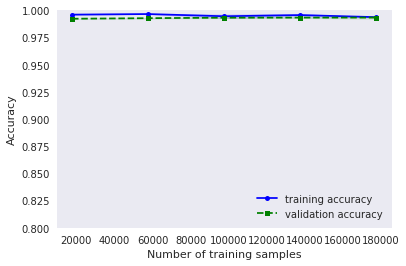

In [278]:



from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])


train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_lr,
                   X=X_SMOTE_train,
                   y=y_SMOTE_train,
                   train_sizes=np.linspace(0.1, 1.0, 5),
                   cv=None,
                   n_jobs=1)
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])

plt.show()

# K-folds

In [280]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_SMOTE_train, y_SMOTE_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.988
